In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

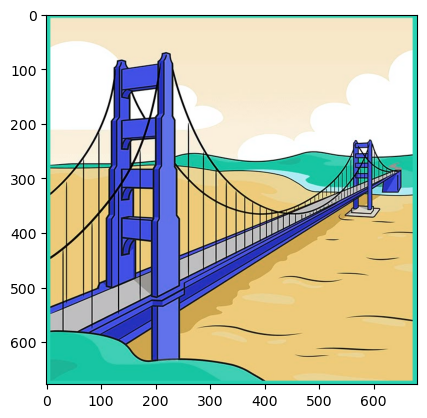

In [3]:
img = cv2.imread('DATA/bridge.jpg')
plt.imshow(img)

# Steps to follow for custom seed watershed - 
- First get img
- Make img copy, make marker img - only x and y , and segment_img - exact copy with color channel
- Get colors - probably - 10 in colors list
- Make global variables - counter for marker, and marked or not
- Then start with callback function. -
- When button pressed - on marker img I will make 1 small circle of the color - of color ind
- Like if I pressed 1 on keyboard and it choose red color, index is 1, so it will make circle of current index color
- Then make circle of color itself on img copy.
- Then get out of this, and make windows
- Now make while true loop.
- Now make sure, to enter k=waitkey... and check again and again what user pressed, if any number, then change the color. If c then clear the img, if esc then close the window
- Now if pressed any number, then change the color and marker counter to another k
- Now check if markers updated, even one. If yes, then show seg, and read img copy. 
- get marker copy
- make watershed on img copy, giving marker copy
- watershed will make marker copy as color ind. So check seg [ where marker == color ind] there make it color[color_ind]
- display both
  

In [6]:
marker_img = np.zeros(img.shape[:2], dtype=np.int32)
img_copy = img.copy()
segment_img = np.zeros(img.shape,dtype=np.uint8)

In [8]:
from matplotlib import cm
def getColors(i):
    return tuple(np.array(cm.Pastel1(i)[:3])*255)
colors = []
for i in range(10):
    colors.append(getColors(i))
colors

[(251.0, 180.0, 174.0),
 (179.0, 205.0, 227.0),
 (204.0, 235.0, 197.0),
 (222.0, 203.0, 228.0),
 (254.0, 217.0, 166.0),
 (255.0, 255.0, 204.0),
 (229.0, 216.0, 189.0),
 (253.0, 218.0, 236.0),
 (242.0, 242.0, 242.0),
 (242.0, 242.0, 242.0)]

In [10]:
marker_counter = 1
mark_updated=False

In [12]:
def draw(event, x,y, flags, param):
    global marker_counter, mark_updated

    if event == cv2.EVENT_LBUTTONDOWN:
        cv2.circle(marker_img, (x, y), 10, (marker_counter), -1) 
        cv2.circle(img_copy, (x,y),10,colors[marker_counter],-1)
        mark_updated=True


In [14]:
cv2.namedWindow('Show')
cv2.setMouseCallback('Show', draw)

while True:
    cv2.imshow("segment", segment_img)
    cv2.imshow("Show", img_copy)
    
    k = cv2.waitKey(1)
    if k == 27:
        break
    elif k==ord('c'):
        marker_img = np.zeros(img.shape[:2], dtype=np.int32)
        img_copy = img.copy()
        segment_img = np.zeros(img.shape,dtype=np.uint8)
    elif k > 0 and chr(k).isdigit():
        marker_counter=int(chr(k))

    if mark_updated :
        # marker_copy = marker_img.copy().astype(np.int32) 
        marker_copy = marker_img.copy()
        cv2.watershed(img, marker_copy)
        seg = np.zeros(img.shape, np.uint8)
        for color in range(10):
            # seg[marker_copy == (color)] = colors[color]
            mask = marker_copy == color
            if np.any(mask):  # Avoid empty selections
                segment_img[mask] = colors[color]

cv2.destroyAllWindows()